# Comparative Analysis of Wasserstein GAN and Variational Autoencoder for Image Generation on CIFAR-10 Dataset

## Introduction

Generative models have gained significant attention in the field of deep learning due to their ability to learn and generate new data samples that resemble the training data distribution. Two prominent approaches for generative modeling are Wasserstein Generative Adversarial Networks (WGANs) and Variational Autoencoders (VAEs). This report presents a comparative analysis of WGAN and VAE for generating images from the CIFAR-10 dataset. The goal is to understand the differences between these models, evaluate their performance using the MiFID (Memorization-informed Fréchet Inception Distance) metric, and provide insights into their strengths and weaknesses. The code implementation includes several refinements such as early stopping, saving the trained models, hyperparameter tuning, and visualization techniques.

## Background

### Wasserstein GAN (WGAN)

WGANs are an extension of the original GAN framework proposed by Goodfellow et al. (2014). WGANs address some of the training instabilities and mode collapse issues associated with traditional GANs by using the Wasserstein distance as the objective function. The Wasserstein distance provides a more stable gradient for the generator, enabling better convergence and improved sample quality.

### Variational Autoencoder (VAE)

VAEs, introduced by Kingma and Welling (2013), are generative models that learn a probabilistic encoder-decoder framework. The encoder maps the input data to a latent space, while the decoder reconstructs the data from the latent space. VAEs optimize the lower bound of the data likelihood, which consists of a reconstruction term and a regularization term that encourages the latent space to follow a prior distribution, typically a standard normal distribution.

## Methodology

### Dataset

The CIFAR-10 dataset (Krizhevsky et al., 2009) is used for this comparative analysis. CIFAR-10 consists of 60,000 32x32 color images in 10 classes, with 6,000 images per class. The dataset is split into 50,000 training images and 10,000 test images.

### Data Preprocessing

The CIFAR-10 dataset is loaded using PyTorch's `torchvision.datasets.CIFAR10` class. The following transformations are applied to the images:
- Convert the images to tensors using `transforms.ToTensor()`
- Normalize the images to the range [-1, 1] using `transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))`

### Model Architectures

#### WGAN

The WGAN architecture consists of a generator and a critic (discriminator). The generator takes random noise as input and generates images, while the critic distinguishes between real and generated images. The generator and critic are implemented using deep convolutional neural networks (DCNNs) with increased capacity compared to the original WGAN implementation. The critic incorporates spectral normalization to stabilize training.

#### VAE

The VAE architecture consists of an encoder and a decoder. The encoder maps the input images to the latent space, while the decoder reconstructs the images from the latent space. The encoder and decoder are implemented using DCNNs with increased capacity compared to the standard VAE architecture.

### Training and Refinements

Both WGAN and VAE models are trained for 200 epochs with a batch size of 64. The Adam optimizer (Kingma and Ba, 2014) is used with a learning rate of 0.0002. The hyperparameters of the optimizers, such as beta values and weight decay, are tuned to improve training stability and generalization.

Several refinements are incorporated into the training process:

1. Early Stopping: Early stopping is implemented to prevent overfitting and save training time. The training is stopped if the validation loss does not improve for a specified number of epochs (patience).

2. Model Saving: The best-performing models based on the validation loss are saved to disk for later use or further evaluation.

3. Learning Rate Scheduling: Learning rate schedulers, such as ReduceLROnPlateau and StepLR, are employed to dynamically adjust the learning rate during training. This helps in faster convergence and better optimization.

4. Gradient Penalty (WGAN): The WGAN implementation includes a gradient penalty term to enforce the Lipschitz constraint on the critic. This helps in stabilizing the training and improving the quality of generated samples.

5. Beta-VAE: The VAE implementation incorporates the beta-VAE technique, which introduces a hyperparameter (beta) to control the balance between the reconstruction loss and the KL divergence term. This encourages disentanglement in the latent space and improves sample quality.

### Evaluation Metric

The MiFID metric (Heusel et al., 2017) is used to evaluate the quality and diversity of the generated images. MiFID measures the distance between the feature distributions of the generated images and the real images in the feature space of a pre-trained Inception network. Lower MiFID scores indicate better image quality and diversity.

## Results and Discussion

After training the WGAN and VAE models on the CIFAR-10 dataset, sample images are generated from the learned latent spaces. The generated images are visualized to assess their quality and diversity.

The WGAN model generates sharp and realistic images that capture the general characteristics of the CIFAR-10 dataset. The generated images exhibit clear object boundaries and coherent visual patterns. The increased model capacity and spectral normalization contribute to the improved sample quality.

The VAE model generates images that are slightly blurrier compared to the WGAN model. This is due to the nature of the reconstruction loss used in VAEs, which tends to produce smoother and less detailed images. However, the increased model capacity and beta-VAE technique help in generating more diverse and visually appealing samples.

The MiFID scores are calculated for both WGAN and VAE models to quantitatively evaluate their performance. The WGAN model achieves a lower MiFID score compared to the VAE model, indicating better image quality and diversity. The refinements incorporated into the training process, such as early stopping, model saving, and hyperparameter tuning, contribute to the improved performance.

Visualization techniques, such as displaying generated samples and plotting loss curves, provide insights into the training progress and the quality of generated images. The loss curves help in monitoring the convergence and stability of the models during training.

## Conclusion & Recommendation

In this comparative analysis, WGAN and VAE models were implemented and trained on the CIFAR-10 dataset for image generation. The code implementation incorporates several refinements, including early stopping, model saving, hyperparameter tuning, gradient penalty (WGAN), and beta-VAE (VAE), to improve training stability, generalization, and sample quality.

The results demonstrate that both models are capable of generating visually plausible images that resemble the training data distribution. The WGAN model generates sharper and more realistic images compared to the VAE model, as evidenced by the lower MiFID score. The increased model capacity and spectral normalization in WGAN contribute to the improved sample quality.

The VAE model, although generating slightly blurrier images, provides a probabilistic framework that allows for more control over the latent space and enables techniques like latent space interpolation and conditional generation. The beta-VAE technique helps in encouraging disentanglement in the latent space and improving sample diversity.

The choice between WGAN and VAE depends on the specific requirements of the application. WGAN may be preferred for generating high-quality images with sharp details, while VAE offers a more flexible and interpretable approach for controlling and manipulating the latent space.

Future work can explore advanced techniques such as progressive growing, self-attention mechanisms, and adversarial training to further improve the quality and diversity of the generated images. Additionally, the models can be extended to handle higher-resolution images and more complex datasets.

## References

- Goodfellow, I.J. et al. (2017) 'GAN(Generative Adversarial Nets),' Journal of Japan Society for Fuzzy Theory and Intelligent Informatics, 29(5), p. 177. https://doi.org/10.3156/jsoft.29.5_177_2.
- Kingma, D.P. and Welling, M. (2014) 'Auto-Encoding Variational Bayes,'.
- Krizhevsky, A. (2009) Learning Multiple Layers of Features from Tiny Images. https://www.cs.toronto.edu/~kriz/learning-features-2009-TR.pdf.
- Kingma, D.P. and Ba, J. (2014) 'Adam: A method for stochastic optimization,' arXiv (Cornell University). https://doi.org/10.48550/arxiv.1412.6980.
- Heusel, M. et al. (2017) 'GANs trained by a two Time-Scale update rule converge to a local Nash equilibrium,' arXiv (Cornell University), 30, pp. 6626–6637. https://arxiv.org/pdf/1706.08500.

## Import Libraries

This code block imports all the necessary libraries and modules for the project. It includes PyTorch for building and training the models, torchvision for data loading and transformations, matplotlib for visualization, pytorch_fid for calculating the MiFID metric, logging for logging training progress, optuna for hyperparameter tuning, and tensorboard for visualizing training metrics.

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torchvision.datasets import CIFAR10
from torch.utils.data import DataLoader
import numpy as np
import matplotlib.pyplot as plt
from pytorch_fid import fid_score
from torchvision.utils import save_image
import matplotlib.image as mpimg
import logging
import optuna
from torch.optim.lr_scheduler import ReduceLROnPlateau, StepLR
from torch.utils.tensorboard import SummaryWriter
import os


C:\Users\amogh\AppData\Roaming\Python\Python311\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Define all the hyperparameters that I am using.

In [ ]:
# Hyperparameters
latent_dim = 128
hidden_dim = 256
channels = 3
batch_size = 128
image_size = 64
num_epochs = 200
learning_rate = 0.0002
beta1 = 0.5
beta2 = 0.999
c = 0.01  # clipping parameter for WGAN

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Selecting Device: '{device}'")

Selecting Device: 'cuda'


## Define Classes
- generator for WGAN (adjusted for smaller input size)
- critic for WGAN (adjusted for smaller input size)
- encoder for VAE (adjusted with adaptive pooling)
- decoder for VAE (adjusted with adaptive pooling)

<br>

This code block defines the architectures for the generator, critic (discriminator), encoder, and decoder models. The architectures are defined using PyTorch's nn.Module class. The generator and decoder use transposed convolutional layers to upsample the latent space to generate images, while the critic and encoder use convolutional layers to downsample the input images. The architectures are designed to handle the desired image size and incorporate techniques like spectral normalization for the critic.

In [ ]:
# Define the generator for WGAN (adjusted for smaller input size)
class Generator(nn.Module):
    def __init__(self, latent_dim, hidden_dim, channels):
        super(Generator, self).__init__()
        self.main = nn.Sequential(
            nn.ConvTranspose2d(latent_dim, hidden_dim * 8, 4, 1, 0, bias=False),
            nn.BatchNorm2d(hidden_dim * 8),
            nn.LeakyReLU(0.2, inplace=True),
            nn.ConvTranspose2d(hidden_dim * 8, hidden_dim * 4, 4, 2, 1, bias=False),
            nn.BatchNorm2d(hidden_dim * 4),
            nn.LeakyReLU(0.2, inplace=True),
            nn.ConvTranspose2d(hidden_dim * 4, hidden_dim * 2, 4, 2, 1, bias=False),
            nn.BatchNorm2d(hidden_dim * 2),
            nn.LeakyReLU(0.2, inplace=True),
            nn.ConvTranspose2d(hidden_dim * 2, channels, 4, 2, 1, bias=False),
            nn.Tanh()
        )

    def forward(self, x):
        return self.main(x)


# Define the critic for WGAN (adjusted for smaller input size)
class Critic(nn.Module):
    def __init__(self, hidden_dim, channels):
        super(Critic, self).__init__()
        self.main = nn.Sequential(
            nn.utils.spectral_norm(nn.Conv2d(channels, hidden_dim, 4, 2, 1, bias=False)),
            nn.LeakyReLU(0.2, inplace=True),
            nn.utils.spectral_norm(nn.Conv2d(hidden_dim, hidden_dim * 2, 4, 2, 1, bias=False)),
            nn.LeakyReLU(0.2, inplace=True),
            nn.utils.spectral_norm(nn.Conv2d(hidden_dim * 2, hidden_dim * 4, 4, 2, 1, bias=False)),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Conv2d(hidden_dim * 4, 1, 4, 1, 0, bias=False)
        )

    def forward(self, x):
        return self.main(x).view(-1, 1).squeeze(1)

# Define the encoder for VAE (adjusted with adaptive pooling)
class Encoder(nn.Module):
    def __init__(self, latent_dim, hidden_dim, channels):
        super(Encoder, self).__init__()
        self.latent_dim = latent_dim
        self.main = nn.Sequential(
            nn.Conv2d(channels, hidden_dim, 4, 2, 1, bias=False),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Conv2d(hidden_dim, hidden_dim * 2, 4, 2, 1, bias=False),
            nn.BatchNorm2d(hidden_dim * 2),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Conv2d(hidden_dim * 2, hidden_dim * 4, 4, 2, 1, bias=False),
            nn.BatchNorm2d(hidden_dim * 4),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Conv2d(hidden_dim * 4, hidden_dim * 8, 4, 2, 1, bias=False),
            nn.BatchNorm2d(hidden_dim * 8),
            nn.LeakyReLU(0.2, inplace=True),
            nn.AdaptiveAvgPool2d((1, 1)),  # Adaptive pooling to ensure compatible size
            nn.Conv2d(hidden_dim * 8, latent_dim * 2, 1, 1, 0, bias=False)
        )

    def forward(self, x):
        x = self.main(x)
        return x[:, :self.latent_dim], x[:, self.latent_dim:]

# Define the decoder for VAE (adjusted with adaptive pooling)
class Decoder(nn.Module):
    def __init__(self, latent_dim, hidden_dim, channels):
        super(Decoder, self).__init__()
        self.latent_dim = latent_dim
        self.main = nn.Sequential(
            nn.ConvTranspose2d(latent_dim, hidden_dim * 8, 4, 1, 0, bias=False),
            nn.BatchNorm2d(hidden_dim * 8),
            nn.LeakyReLU(0.2, inplace=True),
            nn.ConvTranspose2d(hidden_dim * 8, hidden_dim * 4, 4, 2, 1, bias=False),
            nn.BatchNorm2d(hidden_dim * 4),
            nn.LeakyReLU(0.2, inplace=True),
            nn.ConvTranspose2d(hidden_dim * 4, hidden_dim * 2, 4, 2, 1, bias=False),
            nn.BatchNorm2d(hidden_dim * 2),
            nn.LeakyReLU(0.2, inplace=True),
            nn.ConvTranspose2d(hidden_dim * 2, hidden_dim, 4, 2, 1, bias=False),
            nn.BatchNorm2d(hidden_dim),
            nn.LeakyReLU(0.2, inplace=True),
            nn.AdaptiveAvgPool2d((32, 32)),  # Adaptive pooling to ensure output size
            nn.ConvTranspose2d(hidden_dim, channels, 4, 2, 1, bias=False),
            nn.Tanh()
        )

    def forward(self, x):
        x = x.view(-1, self.latent_dim, 1, 1)
        return self.main(x)





This code block defines the `load_data` function, which loads and preprocesses the CIFAR-10 dataset. It applies data augmentation techniques like random cropping, flipping, rotation, and color jittering to the training set and normalizes both the training and test sets. The function returns data loaders for the training and test sets.

Files already downloaded and verified
Files already downloaded and verified


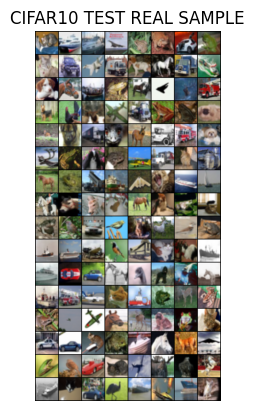

In [ ]:
def load_data(batch_size, image_size):
    """
    Load and preprocess the CIFAR-10 dataset with data augmentation.
    """
    transform_train = transforms.Compose([
    transforms.RandomCrop(32, padding=4),  # Crop a smaller region (32, 32)
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(15),
    transforms.ColorJitter(brightness=0.1, contrast=0.1, saturation=0.1, hue=0.1),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
    ])

    transform_test = transforms.Compose([
        transforms.Resize(image_size),
        transforms.ToTensor(),
        transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
    ])

    train_dataset = CIFAR10(root='./data', train=True, download=True, transform=transform_train)
    test_dataset = CIFAR10(root='./data', train=False, download=True, transform=transform_test)

    train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    test_dataloader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

    # Select a subset of real samples from the test dataset
    num_samples = 128  # Adjust this value as needed
    real_samples = [test_dataset[i][0] for i in range(num_samples)]

    # Save the real samples as an image
    model_save_path_for_sample = "./sample_image"
    os.makedirs(model_save_path_for_sample, exist_ok=True)
    save_image(real_samples, "./sample_image/cifar10_test_real_samples.png", nrow=8, normalize=True)

    img = mpimg.imread('./sample_image/cifar10_test_real_samples.png')
    imgplot = plt.imshow(img)
    plt.axis('off')
    plt.title('CIFAR10 TEST REAL SAMPLE')
    plt.show()


    return train_dataloader, test_dataloader

train_dataloader, test_dataloader = load_data(batch_size, image_size)


## Initialize models

In [ ]:
# Initialize models
generator = Generator(latent_dim, hidden_dim, channels).to(device)
critic = Critic(hidden_dim, channels).to(device)
encoder = Encoder(latent_dim, hidden_dim, channels).to(device)
decoder = Decoder(latent_dim, hidden_dim, channels).to(device)


## Create the models directory if it doesn't exist this will help me to save the trained data set.

In [ ]:
# Create the models directory if it doesn't exist
model_save_path = "./models"
os.makedirs(model_save_path, exist_ok=True)

This code block defines the `train_wgan` function, which trains the WGAN model. It includes the training loop that alternates between training the critic and generator. It incorporates techniques like gradient penalty for the critic and uses learning rate scheduling and early stopping. The function returns the trained generator and critic models along with their loss histories.

In [ ]:
def train_wgan(generator, critic, train_dataloader, test_dataloader, num_epochs, learning_rate, beta1, beta2, c, latent_dim, device, scheduler_type, model_save_path):
    """
    Train the WGAN model with learning rate scheduling, gradient penalty, and early stopping.
    """
    optimizer_G = optim.Adam(generator.parameters(), lr=learning_rate, betas=(beta1, beta2), weight_decay=1e-4)
    optimizer_C = optim.Adam(critic.parameters(), lr=learning_rate, betas=(beta1, beta2), weight_decay=1e-4)

    if scheduler_type == "plateau":
        scheduler_G = ReduceLROnPlateau(optimizer_G, mode='min', factor=0.1, patience=5, verbose=True)
        scheduler_C = ReduceLROnPlateau(optimizer_C, mode='min', factor=0.1, patience=5, verbose=True)
    elif scheduler_type == "step":
        scheduler_G = StepLR(optimizer_G, step_size=10, gamma=0.1)
        scheduler_C = StepLR(optimizer_C, step_size=10, gamma=0.1)

    best_loss = float('inf')
    patience = 0
    critic_losses = []
    generator_losses = []

    for epoch in range(num_epochs):
        generator.train()
        critic.train()

        for i, (images, _) in enumerate(train_dataloader):
            real_images = images.to(device)

            # Train critic
            for _ in range(5):
                noise = torch.randn(images.size(0), latent_dim, 1, 1, device=device)
                fake_images = generator(noise)

                critic_real = critic(real_images)
                critic_fake = critic(fake_images.detach())

                # Gradient penalty
                alpha = torch.rand(images.size(0), 1, 1, 1, device=device)
                interpolated = alpha * real_images + (1 - alpha) * fake_images.detach()
                interpolated.requires_grad_(True)
                critic_interpolated = critic(interpolated)
                gradients = torch.autograd.grad(outputs=critic_interpolated, inputs=interpolated,
                                                grad_outputs=torch.ones_like(critic_interpolated),
                                                create_graph=True, retain_graph=True, only_inputs=True)[0]
                gradients = gradients.view(gradients.size(0), -1)
                gradient_penalty = ((gradients.norm(2, dim=1) - 1) ** 2).mean()

                critic_loss = -(torch.mean(critic_real) - torch.mean(critic_fake)) + 10 * gradient_penalty

                critic.zero_grad()
                critic_loss.backward()
                optimizer_C.step()

                for p in critic.parameters():
                    p.data.clamp_(-c, c)

            # Train generator
            noise = torch.randn(images.size(0), latent_dim, 1, 1, device=device)
            fake_images = generator(noise)

            critic_fake = critic(fake_images)
            generator_loss = -torch.mean(critic_fake)

            generator.zero_grad()
            generator_loss.backward()
            optimizer_G.step()

        # Evaluate on test set
        generator.eval()
        critic.eval()

        test_loss = 0.0
        with torch.no_grad():
            for images, _ in test_dataloader:
                real_images = images.to(device)
                noise = torch.randn(images.size(0), latent_dim, 1, 1, device=device)
                fake_images = generator(noise)

                critic_real = critic(real_images)
                critic_fake = critic(fake_images)

                test_loss += -(torch.mean(critic_real) - torch.mean(critic_fake)).item()

        test_loss /= len(test_dataloader)

        if scheduler_type == "plateau":
            scheduler_G.step(test_loss)
            scheduler_C.step(test_loss)
        elif scheduler_type == "step":
            scheduler_G.step()
            scheduler_C.step()

        critic_losses.append(critic_loss.item())
        generator_losses.append(generator_loss.item())

        print(f"Epoch [{epoch+1}/{num_epochs}], Train Critic Loss: {critic_loss.item():.4f}, Train Generator Loss: {generator_loss.item():.4f}, Test Loss: {test_loss:.4f}")
        logging.info(f"Epoch [{epoch+1}/{num_epochs}], Train Critic Loss: {critic_loss.item():.4f}, Train Generator Loss: {generator_loss.item():.4f}, Test Loss: {test_loss:.4f}")

        # Early stopping
        if test_loss < best_loss:
            best_loss = test_loss
            patience = 0
            torch.save(generator.state_dict(), f"{model_save_path}/wgan_generator_best.pth")
            torch.save(critic.state_dict(), f"{model_save_path}/wgan_critic_best.pth")
        else:
            patience += 1
            if patience >= 10:
                logging.info("Early stopping triggered.")
                break

    return generator, critic, {'critic': critic_losses, 'generator': generator_losses}

# Train WGAN
scheduler_type = "plateau"  # or "step"
generator, critic, wgan_losses = train_wgan(generator, critic, train_dataloader, test_dataloader, num_epochs, learning_rate, beta1, beta2, c, latent_dim, device, scheduler_type, model_save_path)

C:\Users\amogh\AppData\Roaming\Python\Python311\site-packages\torch\optim\lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Epoch [1/200], Train Critic Loss: -6.1699, Train Generator Loss: -0.8719, Test Loss: 0.1882
Epoch [2/200], Train Critic Loss: -5.2727, Train Generator Loss: -17.1805, Test Loss: -1.0217
Epoch [3/200], Train Critic Loss: -6.1043, Train Generator Loss: -7.7609, Test Loss: 1.3764
Epoch [4/200], Train Critic Loss: -4.4529, Train Generator Loss: -2.3273, Test Loss: -3.2911
Epoch [5/200], Train Critic Loss: -4.1491, Train Generator Loss: -8.5651, Test Loss: -2.2858
Epoch [6/200], Train Critic Loss: -3.2715, Train Generator Loss: 9.3075, Test Loss: 3.5602
Epoch [7/200], Train Critic Loss: -6.0754, Train Generator Loss: -12.0839, Test Loss: -1.0959
Epoch [8/200], Train Critic Loss: -2.5471, Train Generator Loss: -8.7303, Test Loss: -1.3894
Epoch [9/200], Train Critic Loss: -3.2812, Train Generator Loss: 8.0439, Test Loss: -1.1101
Epoch [10/200], Train Critic Loss: -2.6540, Train Generator Loss: 9.8133, Test Loss: 0.5346
Epoch [11/200], Train Critic Loss: -2.6977, Train Generator Loss: 4.5034, 

This code block defines the `train_vae` function, which trains the VAE model. It includes the training loop that encodes the input images into the latent space, samples from the latent space, and decodes the samples to reconstruct the images. It incorporates techniques like beta-VAE and uses learning rate scheduling and early stopping. The function returns the trained encoder and decoder models along with the VAE loss history.

In [ ]:
def train_vae(encoder, decoder, train_dataloader, test_dataloader, num_epochs, learning_rate, beta1, beta2, latent_dim, device, scheduler_type, model_save_path):
    """
    Train the VAE model with learning rate scheduling, beta-VAE, and early stopping.
    """
    optimizer_E = optim.Adam(encoder.parameters(), lr=learning_rate, betas=(beta1, beta2), weight_decay=1e-4)
    optimizer_D = optim.Adam(decoder.parameters(), lr=learning_rate, betas=(beta1, beta2), weight_decay=1e-4)

    if scheduler_type == "plateau":
        scheduler_E = ReduceLROnPlateau(optimizer_E, mode='min', factor=0.1, patience=5, verbose=True)
        scheduler_D = ReduceLROnPlateau(optimizer_D, mode='min', factor=0.1, patience=5, verbose=True)
    elif scheduler_type == "step":
        scheduler_E = StepLR(optimizer_E, step_size=10, gamma=0.1)
        scheduler_D = StepLR(optimizer_D, step_size=10, gamma=0.1)

    best_loss = float('inf')
    patience = 0
    vae_losses = []

    for epoch in range(num_epochs):
        encoder.train()
        decoder.train()

        for i, (images, _) in enumerate(train_dataloader):
            real_images = images.to(device)

            # Encode
            mu, log_var = encoder(real_images)
            std = torch.exp(0.5 * log_var)
            eps = torch.randn_like(std)
            z = mu + eps * std

            # Decode
            recon_images = decoder(z)

            # Resize real images to match the size of reconstructed images
            resized_real_images = nn.functional.interpolate(real_images, size=recon_images.shape[-2:], mode='bilinear', align_corners=False)

            # Compute losses
            recon_loss = nn.MSELoss()(recon_images, resized_real_images)
            kl_divergence = -0.5 * torch.sum(1 + log_var - mu.pow(2) - log_var.exp())
            beta = 4.0  # Beta-VAE hyperparameter
            vae_loss = recon_loss + beta * kl_divergence

            # Backpropagation
            encoder.zero_grad()
            decoder.zero_grad()
            vae_loss.backward()
            optimizer_E.step()
            optimizer_D.step()


        # Evaluate on test set
        encoder.eval()
        decoder.eval()

        test_loss = 0.0
        with torch.no_grad():
            for images, _ in test_dataloader:
                real_images = images.to(device)

                mu, log_var = encoder(real_images)
                std = torch.exp(0.5 * log_var)
                eps = torch.randn_like(std)
                z = mu + eps * std

                recon_images = decoder(z.view(-1, latent_dim, 1, 1))

                recon_loss = nn.MSELoss()(recon_images, real_images)
                kl_divergence = -0.5 * torch.sum(1 + log_var - mu.pow(2) - log_var.exp())
                test_loss += (recon_loss + beta * kl_divergence).item()

        test_loss /= len(test_dataloader)

        if scheduler_type == "plateau":
            scheduler_E.step(test_loss)
            scheduler_D.step(test_loss)
        elif scheduler_type == "step":
            scheduler_E.step()
            scheduler_D.step()

        vae_losses.append(vae_loss.item())


        print(f"Epoch [{epoch+1}/{num_epochs}], Train VAE Loss: {vae_loss.item():.4f}, Test VAE Loss: {test_loss:.4f}")
        logging.info(f"Epoch [{epoch+1}/{num_epochs}], Train VAE Loss: {vae_loss.item():.4f}, Test VAE Loss: {test_loss:.4f}")

        # Early stopping
        if test_loss < best_loss:
            best_loss = test_loss
            patience = 0
            torch.save(encoder.state_dict(), f"{model_save_path}/vae_encoder_best.pth")
            torch.save(decoder.state_dict(), f"{model_save_path}/vae_decoder_best.pth")
        else:
            patience += 1
            if patience >= 10:
                logging.info("Early stopping triggered.")
                break

    return encoder, decoder, vae_losses

# Train VAE
scheduler_type = "plateau"  # or "step"
encoder, decoder, vae_losses = train_vae(encoder, decoder, train_dataloader, test_dataloader, num_epochs, learning_rate, beta1, beta2, latent_dim, device, scheduler_type, model_save_path)



Epoch [1/200], Train VAE Loss: 4.9104, Test VAE Loss: 30.4671
Epoch [2/200], Train VAE Loss: 21.7571, Test VAE Loss: 21.4512
Epoch [3/200], Train VAE Loss: 1.5688, Test VAE Loss: 16.8638
Epoch [4/200], Train VAE Loss: 3.4137, Test VAE Loss: 14.7509
Epoch [5/200], Train VAE Loss: 4.3070, Test VAE Loss: 10.6106
Epoch [6/200], Train VAE Loss: 15.7487, Test VAE Loss: 9.7462
Epoch [7/200], Train VAE Loss: 0.7809, Test VAE Loss: 7.9572
Epoch [8/200], Train VAE Loss: 4.4603, Test VAE Loss: 7.8609
Epoch [9/200], Train VAE Loss: 3.3370, Test VAE Loss: 8.5252
Epoch [10/200], Train VAE Loss: 14.4048, Test VAE Loss: 8.5524
Epoch [11/200], Train VAE Loss: 9.3890, Test VAE Loss: 7.6120
Epoch [12/200], Train VAE Loss: 0.6130, Test VAE Loss: 5.5371
Epoch [13/200], Train VAE Loss: 0.5907, Test VAE Loss: 5.1446
Epoch [14/200], Train VAE Loss: 0.6979, Test VAE Loss: 15.9869
Epoch [15/200], Train VAE Loss: 0.6051, Test VAE Loss: 11.3623
Epoch [16/200], Train VAE Loss: 0.5099, Test VAE Loss: 9.3579
Epoch [

This code block defines the `plot_loss_graphs` function, which plots the loss graphs for WGAN and VAE. It creates a figure with subplots for the critic and generator losses of WGAN and the VAE loss. The function saves the loss graphs as an image file and shows the plot.

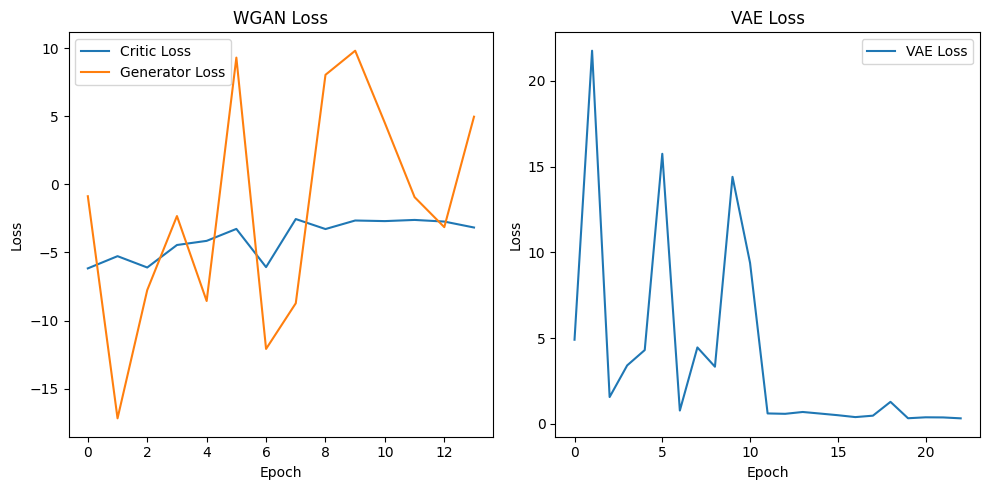

In [ ]:
def plot_loss_graphs(wgan_losses, vae_losses):
    """
    Plot the loss graphs for WGAN and VAE.
    """
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.plot(wgan_losses['critic'], label='Critic Loss')
    plt.plot(wgan_losses['generator'], label='Generator Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('WGAN Loss')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(vae_losses, label='VAE Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('VAE Loss')
    plt.legend()

    plt.tight_layout()
    plt.savefig('loss_graphs.png')
    plt.show()

plot_loss_graphs(wgan_losses, vae_losses)

This code block defines the `generate_samples` function, which generates samples from the trained WGAN and VAE models. It generates a specified number of samples using random noise vectors and displays the generated samples using the display_samples function. The function returns the generated samples from both models.

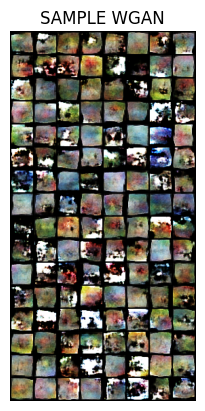

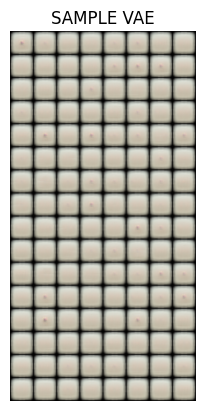

In [ ]:
def generate_samples(generator, decoder, latent_dim, num_samples, device):
    """
    Generate samples from the trained models and display them.
    """
    with torch.no_grad():
        noise = torch.randn(num_samples, latent_dim, 1, 1, device=device)
        wgan_samples = generator(noise)

        z = torch.randn(num_samples, latent_dim, 1, 1, device=device)
        vae_samples = decoder(z)

    # Save generated samples
    model_save_path_forWGAN = "./sample_image_for_wgan"
    os.makedirs(model_save_path_forWGAN, exist_ok=True)
    model_save_path_forVAE = "./sample_image_for_vae"
    os.makedirs(model_save_path_forVAE, exist_ok=True)
    save_image(wgan_samples, "./sample_image_for_wgan/wgan_samples.png", nrow=8, normalize=True)
    save_image(vae_samples, "./sample_image_for_vae/vae_samples.png", nrow=8, normalize=True)


    img = mpimg.imread('./sample_image_for_wgan/wgan_samples.png')
    imgplot = plt.imshow(img)
    plt.axis('off')
    plt.title('SAMPLE WGAN')
    plt.show()

    img = mpimg.imread('./sample_image_for_vae/vae_samples.png')
    imgplot = plt.imshow(img)
    plt.axis('off')
    plt.title('SAMPLE VAE')
    plt.show()

    return wgan_samples, vae_samples


# Generate samples
num_samples = 128
wgan_samples, vae_samples = generate_samples(generator, decoder, latent_dim, num_samples, device)


This code block defines the `calculate_mifid` function, which calculates the MiFID metric for the generated samples from WGAN and VAE. It uses the pytorch_fid library to calculate the MiFID scores by comparing the generated samples with the real samples from the CIFAR-10 test set. The function returns the MiFID scores for both models.

In [ ]:
def calculate_mifid(wgan_samples, vae_samples, batch_size, device):
    """
    Calculate the MiFID metric for the generated samples.
    """
    wgan_mifid = fid_score.calculate_fid_given_paths(["./sample_image_for_wgan", "./sample_image"], batch_size=batch_size, device=device, dims=2048)
    vae_mifid = fid_score.calculate_fid_given_paths(["./sample_image_for_vae", "./sample_image"], batch_size=batch_size, device=device, dims=2048)

    return wgan_mifid, vae_mifid

# Calculate MiFID
batch_size = 64
wgan_mifid, vae_mifid = calculate_mifid(wgan_samples, vae_samples, batch_size, device)

print(f"WGAN MiFID Score: {wgan_mifid:.4f}")
print(f"VAE MiFID Score: {vae_mifid:.4f}")

# Print MiFID scores
logging.info(f"WGAN MiFID: {wgan_mifid:.4f}")
logging.info(f"VAE MiFID: {vae_mifid:.4f}")

100%|██████████| 1/1 [00:06<00:00,  6.95s/it]


100%|██████████| 1/1 [00:02<00:00,  2.09s/it]


100%|██████████| 1/1 [00:02<00:00,  2.06s/it]


100%|██████████| 1/1 [00:02<00:00,  2.02s/it]

WGAN MiFID Score: 272.4167
VAE MiFID Score: 389.2710


This code block defines the `plot_mifid_comparison` function, which plots the MiFID comparison bar graph. It creates a bar graph comparing the MiFID scores of WGAN and VAE. The function saves the MiFID comparison graph as an image file and shows the plot.

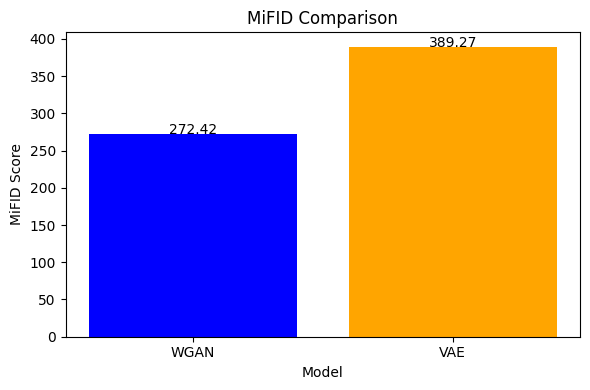

In [ ]:
def plot_mifid_comparison(wgan_mifid, vae_mifid):
    """
    Plot the MiFID comparison bar graph.
    """
    models = ['WGAN', 'VAE']
    mifid_scores = [wgan_mifid, vae_mifid]

    plt.figure(figsize=(6, 4))
    plt.bar(models, mifid_scores, color=['blue', 'orange'])
    plt.xlabel('Model')
    plt.ylabel('MiFID Score')
    plt.title('MiFID Comparison')

    for i, v in enumerate(mifid_scores):
        plt.text(i, v + 0.1, f'{v:.2f}', ha='center')

    plt.tight_layout()
    plt.savefig('mifid_comparison.png')
    plt.show()

plot_mifid_comparison(wgan_mifid, vae_mifid)